# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from utils.data import load_breast_cancer_kagglehub, standardize_fit_transform
from PCA.pca_numpy import PCA

# Load and standardize data


In [2]:
X, y, feature_names = load_breast_cancer_kagglehub()
Xs, scaler = standardize_fit_transform(X)

print("Dataset shape:", Xs.shape)
print("First 5 feature names:", feature_names[:5])

Loaded CSV: C:\Users\Wind\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2\data.csv
Dataset shape: (569, 30)
First 5 feature names: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']


# Fit PCA (full) and show explained variance
We'll fit PCA with all components to visualize how variance is distributed.

In [3]:
pca_full = PCA(n_components=None, random_state=42)
Zfull = pca_full.fit_transform(Xs)

evr = pca_full.explained_variance_ratio_
cum = np.cumsum(evr)

print("Total components:", len(evr))
print("First 10 EVR:", evr[:10])
print("Cumulative EVR at 2,5,10,15,20:",
      cum[1], cum[4], cum[9], cum[14], cum[19])

Total components: 30
First 10 EVR: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
Cumulative EVR at 2,5,10,15,20: 0.6324320765155944 0.8473427431680723 0.9515688143366668 0.986488122714547 0.9955720432628138


# Plot cumulative explained variance

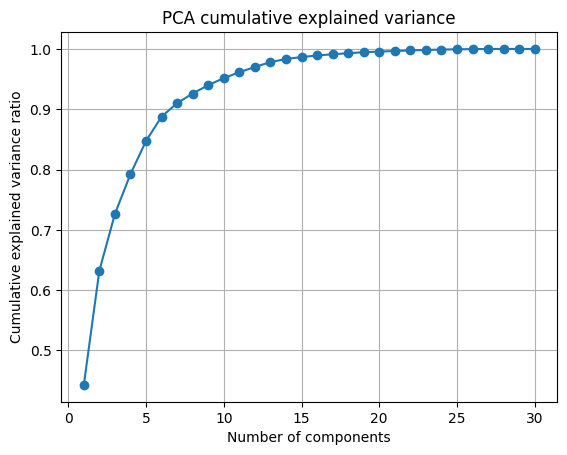

In [4]:
plt.figure()
plt.plot(np.arange(1, len(evr)+1), cum, marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance ratio")
plt.title("PCA cumulative explained variance")
plt.grid(True)
plt.show()

# Reconstruction error vs number of components


In [5]:
components_list = [2, 5, 10, 15, 20, 30]
errors = []

for m in components_list:
    pca = PCA(n_components=m, random_state=42)
    pca.fit(Xs)
    err = pca.reconstruction_error(Xs)
    errors.append(err)
    print(f"m={m:2d} -> reconstruction MSE={err:.6f}")

m= 2 -> reconstruction MSE=0.367568
m= 5 -> reconstruction MSE=0.152657
m=10 -> reconstruction MSE=0.048431
m=15 -> reconstruction MSE=0.013512
m=20 -> reconstruction MSE=0.004428
m=30 -> reconstruction MSE=0.000000


# Plot reconstruction error


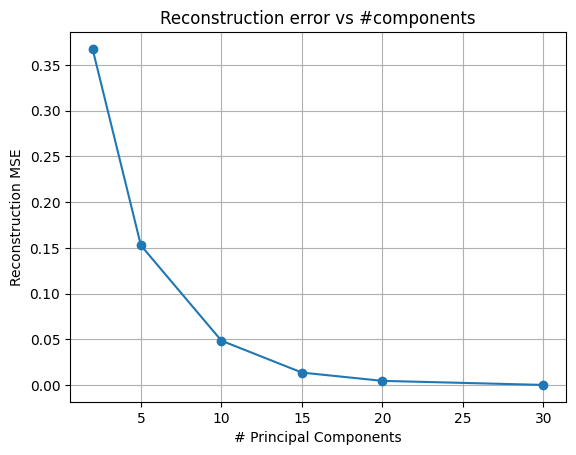

In [6]:
plt.figure()
plt.plot(components_list, errors, marker="o")
plt.xlabel("# Principal Components")
plt.ylabel("Reconstruction MSE")
plt.title("Reconstruction error vs #components")
plt.grid(True)
plt.show()